In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("train.csv.zip",index_col=0)
test_df = pd.read_csv("test.csv.zip",index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv.zip'

<AxesSubplot:xlabel='target', ylabel='count'>

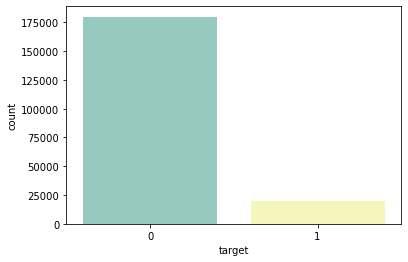

In [3]:
sns.countplot(train_df['target'], palette='Set3')

In [4]:
train_df["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [5]:
train_df_0 = train_df[train_df['target'] == 0]
train_df_1 = train_df[train_df['target'] == 1]
train_df_1_resample = train_df_1.sample(n=1000,replace=False,axis=0)
train_df_0_resample = train_df_0.sample(n=1000,replace=False,axis=0)

In [6]:
new_train_df = pd.concat([train_df_0_resample,train_df_1_resample],axis=0)
new_train_df

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_182441,0,10.9737,-2.7212,12.2556,3.5929,13.3702,9.3316,4.5349,20.3147,-0.6414,...,4.2496,10.6792,1.7368,0.2051,11.6572,1.1973,9.4878,8.1458,13.8475,9.1632
train_47096,0,11.9998,6.1510,8.4010,7.6555,11.2702,7.7612,5.1604,21.5015,0.3788,...,6.9136,7.7628,2.4661,12.2814,17.2701,0.6449,-3.7681,9.3441,22.8392,-13.8421
train_46427,0,10.6003,-2.9563,7.3665,10.1899,12.2038,1.7290,4.2858,11.9045,6.1558,...,0.5593,3.6345,0.2184,-2.2726,21.8692,0.9281,-5.1831,9.1242,18.4134,8.8957
train_55935,0,12.3167,-4.4945,6.7338,6.5256,10.6927,-2.2523,6.4094,15.6645,-3.9562,...,6.7441,6.2868,0.9003,-1.1641,20.1415,0.9274,9.7951,8.2044,13.4595,-1.4031
train_174337,0,16.8291,-9.0097,14.0495,5.3397,12.4134,0.1958,4.4049,19.4997,-4.6313,...,-0.3697,6.8628,1.8962,4.8207,14.1539,1.0073,5.0522,8.6131,16.4658,-16.2425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_72916,1,14.7208,1.0362,12.3238,8.0755,8.6288,-3.9484,6.6357,19.2845,5.7397,...,2.3906,7.4373,-0.2916,4.6268,19.0622,-0.5872,4.5890,7.8241,20.5936,10.2743
train_40696,1,16.0456,3.0133,8.0936,8.1017,9.1416,-4.8372,6.2008,14.3469,3.5453,...,4.3149,10.4263,1.2603,5.7981,10.8781,0.0391,-9.3372,10.1673,18.6318,4.7522
train_177082,1,9.4869,1.0786,13.2960,1.7995,9.3621,1.9421,6.4929,16.3955,2.6899,...,12.6956,6.2124,-0.0469,-3.9557,22.6041,-1.1672,5.8291,7.6355,14.6637,-10.7085


<AxesSubplot:xlabel='target', ylabel='count'>

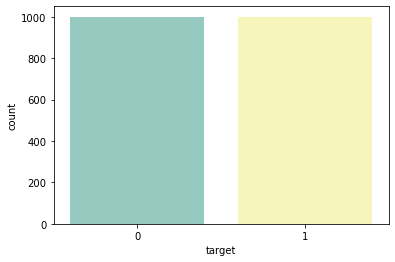

In [7]:
sns.countplot(new_train_df['target'], palette='Set3')

In [13]:
X = new_train_df.iloc[:,1:].values
X.shape

(2000, 200)

In [14]:
y = new_train_df.iloc[:,0].values
y.shape

(2000,)

In [10]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2,f_classif,mutual_info_classif

#### 特征选择 ####
## sklearn的 特征选择
## 分类问题：
## chi2(非负特征的卡方统计) 指标要求特征都是非负的
## f_classif(方差分析F值)
## mutual_info_classif(互信息)
## 回归问题：
"""
#### 特征选择 ####
## sklearn的 特征选择

过滤式单变量特征选择

第一个参数: score_func

    分类问题：
    chi2(非负特征的卡方统计) 指标要求特征都是非负的
    f_classif(方差分析F值)
    mutual_info_classif(互信息)   ### 跑起来比较慢
    回归问题：
    f_regression
    mutual_info_regression

第二个参数: mode 
    percentile : 要保留的百分比   param： 0-100
    k_best: 要保留的数目          param： feature_num
    fpr:
    fdr:
    fwe:
    
"""

transformer = GenericUnivariateSelect(score_func = f_classif, mode='percentile', param=20)
X_new = transformer.fit_transform(X, y)
X_new.shape

(2000, 40)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
"""
    根据模型得到特征的重要性
    
"""
selector = SelectFromModel(estimator=LogisticRegression(solver='liblinear')).fit(X, y)
# selector.estimator_.feature_importances_
# selector.threshold_
X_new = selector.transform(X)
X_new.shape

(2000, 44)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

"""
    顺序特征选择(前向，后向)
    ### 很慢，别用
"""

sfs = SequentialFeatureSelector(estimator = RandomForestClassifier(), n_features_to_select=20,direction='forward')
sfs.fit(X, y)
X_new = sfs.transform(X)
X_new.shape

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

"""
嵌入式递归特征选择
    SVM 好像只能用线性核，很慢
    
    REFCV 通过交叉验证选择特征数，以时间为代价

"""

estimator = RandomForestClassifier()  
# selector = RFE(estimator,n_features_to_select=20,step=0.5)
selector = RFECV(estimator, step=0.2, cv=5)
selector = selector.fit(X, y)
X_new = selector.transform(X)
X_new.shape

In [ ]:
from ITMO_FS.filters.univariate import select_k_best
from ITMO_FS.filters.univariate import UnivariateFilter
from ITMO_FS.filters.univariate import f_ratio_measure,gini_index, su_measure,spearman_corr,pearson_corr, fechner_corr,kendall_corr,reliefF_measure,chi2_measure,information_gain

"""

    ITMO_FS , 中的  单变量过滤式  特征选择方法，只列举一些sklearn没有的
    第一个参数 ： f_ratio_measure,gini_index, su_measure,spearman_corr,pearson_corr, 
            fechner_corr,kendall_corr,reliefF_measure,chi2_measure,information_gain
            
            以前试过relieF,西瓜书上有讲，不过好像有点慢
            
    第二个参数 ：select_best_by_value(), select_k_best(), select_best_percentage() 
    
    
"""

ufilter = UnivariateFilter(reliefF_measure, select_k_best(10))
ufilter.fit(X,y)
X_new = ufilter.transform(X)
X_new.shape

In [ ]:
from ITMO_FS.filters.multivariate import MultivariateFilter
"""

    第一个参数：'MIM','MRMR','JMI'   MRMR好像更有名一点

"""
model = MultivariateFilter('MRMR', 8)
model.fit(X,y)
X_new = model.fit_transform(X)
X_new.shape

In [ ]:
"""
    数据降维的方法
    LLE : 西瓜书上有讲

"""
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=12)
embedding.fit(X,y)
X_new = embedding.transform(X)
X_new.shape

No handles with labels found to put in legend.


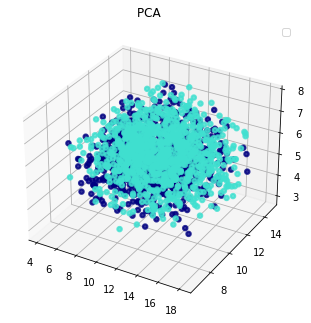

In [33]:
"""
    各种不同的PCA
    PCA
    KernelPCA : 针对线性不可分的数据集，使用非线性的核函数把样本空间映射到线性可分的高维空间，然后在这个高维空间进行主成分分析
    SparsePCA : 针对主成分分析结果解释性弱的问题，通过提取最能重建数据的稀疏分量， 凸显主成分中的主要组成部分，
                容易解释哪些原始变量导致了样本之间的差异
    IncrementalPCA : 针对大型数据集，为了解决内存限制问题，将数据分成多批，通过增量方式逐步调用主成分分析算法，最终完成整个数据集的降维。
    

"""
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA

pca =  PCA(n_components=3)
pca.fit(X,y)
new_X = pca.transform(X)
pca.components_.shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


fig = plt.figure()
ax = Axes3D(fig)
colors = ['navy', 'turquoise',]
lw = 2

for color, i in zip(colors, [0, 1]):
    ax.scatter(X_new[y == i, 0], X_new[y == i, 1], X_new[y==i,2],color=color, alpha=.8, lw=lw,)
ax.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA ')

plt.show()

No handles with labels found to put in legend.


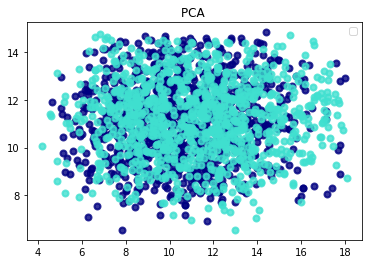

In [28]:
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA

pca =  SparsePCA(n_components=3)
pca.fit(X,y)
new_X = pca.transform(X)
pca.components_.shape

plt.figure()
colors = ['navy', 'turquoise',]
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=.8, lw=lw,)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA ')

plt.show()

No handles with labels found to put in legend.


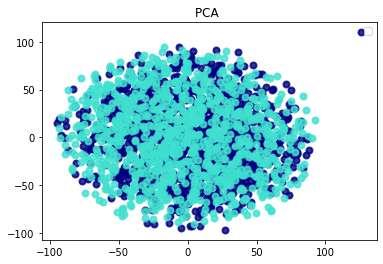

In [35]:
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA

pca =  KernelPCA(n_components=3,kernel='rbf')
pca.fit(X,y)
new_X = pca.transform(X)
new_X.shape

plt.figure()
colors = ['navy', 'turquoise',]
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=.8, lw=lw,)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA ')

plt.show()

In [ ]:
"""
    降维后的可视化
    
"""

No handles with labels found to put in legend.


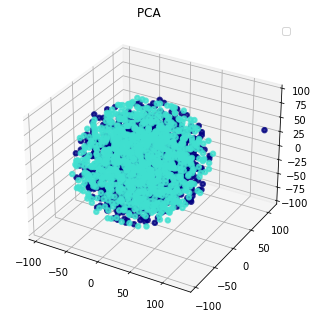

In [34]:
"""
    数据降维的方法
    T-SNE : 不太懂，用于可视化比较多吧

"""
from sklearn.manifold import TSNE
embedding = TSNE(n_components=3)
X_new = embedding.fit_transform(X)
X_new.shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


fig = plt.figure()
ax = Axes3D(fig)
colors = ['navy', 'turquoise',]
lw = 2

for color, i in zip(colors, [0, 1]):
    ax.scatter(X_new[y == i, 0], X_new[y == i, 1], X_new[y==i,2],color=color, alpha=.8, lw=lw,)
ax.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA ')

plt.show()

No handles with labels found to put in legend.


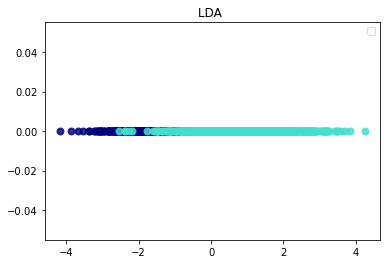

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

"""
  LDA : 
"""

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
X_new = clf.transform(X)

plt.figure()
colors = ['navy', 'turquoise',]
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_new[y == i, 0],np.zeros_like(X_new[y==i,0]),color=color, alpha=.8, lw=lw,)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA ')
plt.show()

In [46]:
"""
    随机搜索 + 网格搜索
    

"""
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3) 
forest = RandomForestClassifier()
forest.fit(X_train, y_train) 
print(f"R2 for training set: {forest.score(X_train, y_train)}") 
print(f"R2 for validation set: {forest.score(X_valid, y_valid)}\n")
forest.get_params() 

R2 for training set: 1.0
R2 for validation set: 0.6983333333333334



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
n_estimators = np.arange(100, 2000, step=100) 
max_features = ["auto", "sqrt", "log2"] 
max_depth = list(np.arange(10, 100, step=10)) + [None] 
min_samples_split = np.arange(2, 10, step=2) 
min_samples_leaf = [1, 2, 4] 
bootstrap = [True, False]

param_grid = { 
    "n_estimators": n_estimators, 
    "max_features": max_features, 
    "max_depth": max_depth, 
    "min_samples_split": min_samples_split, 
    "min_samples_leaf": min_samples_leaf, 
    "bootstrap": bootstrap, 
} 

from sklearn.model_selection import RandomizedSearchCV 
 
forest = RandomForestClassifier() 
 
random_cv = RandomizedSearchCV( 
    forest, param_grid, n_iter=100, cv=3, scoring="accuracy", n_jobs=-1 
)
random_cv.fit(X, y) 
 
print("Best params:\n") 
print(random_cv.best_params_) 

Best params:

{'n_estimators': 1900, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 60, 'bootstrap': True}


In [ ]:
new_params = { 
    "n_estimators": [1600, 1700, 1800, 1900, 2000,2100], 
    "max_features": ['logw'], 
    "max_depth": [50, 55, 60, 65, 70], 
    "min_samples_split": [6, 8, 10], 
    "min_samples_leaf": [2, 4,6], 
    "bootstrap": [True], 
}

In [50]:
random_cv.best_score_

0.7705028866947906

In [53]:
from sklearn.model_selection import GridSearchCV 

forest = RandomForestClassifier() 

new_params = { 
    "n_estimators": [1600, 1700, 1800, 1900, 2000,2100], 
    "max_features": ['log2'], 
    "max_depth": [50, 55, 60, 65, 70], 
    "min_samples_split": [6, 8, 10], 
    "min_samples_leaf": [2, 4,6], 
    "bootstrap": [True], 
}


grid_cv = GridSearchCV(forest, new_params,cv=3, n_jobs=-1)
grid_cv.fit(X, y) 
print('Best params:\n') 
print(grid_cv.best_params_, '\n')

Best params:

{'bootstrap': True, 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1700} 



In [54]:
grid_cv.best_score_

0.77650213932073

In [61]:
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
from hyperopt.fmin import generate_trials_to_calculate

from sklearn.model_selection import cross_validate

def hyperopt_train(params,X,Y):
    clf = RandomForestClassifier(**params)
    res = cross_validate(clf, X, Y, scoring=['accuracy'], cv=3)
    return res['test_accuracy'].mean()


space_knn = {'n_estimators': hp.choice('n_estimators', range(1500, 2000,100)),
             'max_features':hp.choice('max_features',['log2','sqrt','auto']),
             "max_depth": hp.choice('max_depth',range(50,80,5)) 
             
            }


def f(parmas):
    acc = hyperopt_train(parmas,X,y)
    return {'loss': -acc, 'status': STATUS_OK}


# trials = Trials()

trials = generate_trials_to_calculate([{'n_estimators':1,'max_features':0,'max_depth':1}])
best = fmin(f, space_knn, algo=tpe.suggest, max_evals=5, trials=trials)
print('best')
print(best)
for trial in trials.trials:
    print(trial)

6trial [04:13, 42.20s/trial, best loss: -0.7685053869461665]                                                           
best
{'max_depth': 1, 'max_features': 0, 'n_estimators': 3}
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.7675043859451657, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'n_estimators': [0], 'max_features': [0], 'max_depth': [0]}, 'vals': {'n_estimators': [1], 'max_features': [0], 'max_depth': [1]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2021, 8, 27, 8, 29, 47, 588000), 'refresh_time': datetime.datetime(2021, 8, 27, 8, 30, 13, 458000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': -0.7685053869461665, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [1], 'max_features': [1], 'n_estimators': [1]}, 'vals': {'max_depth': [1], 'max_features': [0], 'n_estimators': [3]}}, 'ex

In [66]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
scaler = StandardScaler()
pca = PCA()
# set the tolerance to a large value to make the example faster
rf = RandomForestClassifier()
pipe = Pipeline(steps=[('scaler',scaler),('pca', pca), ('rf', rf)])



n_estimators = np.arange(100, 2000, step=100) 
max_features = ["auto", "sqrt", "log2"] 
max_depth = list(np.arange(10, 100, step=10)) + [None] 
min_samples_split = np.arange(2, 10, step=2) 
min_samples_leaf = [1, 2, 4] 
bootstrap = [True, False]

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 20, 30, 60],
    'rf__n_estimators': n_estimators,
    "rf__max_features": max_features, 
    "rf__max_depth": max_depth, 
    "rf__min_samples_split": min_samples_split, 
    "rf__min_samples_leaf": min_samples_leaf, 
    "rf__bootstrap": bootstrap, 
}
search = RandomizedSearchCV(pipe, param_grid,n_iter=100,cv = 3,n_jobs=-1)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.735):
{'rf__n_estimators': 1500, 'rf__min_samples_split': 4, 'rf__min_samples_leaf': 2, 'rf__max_features': 'sqrt', 'rf__max_depth': 60, 'rf__bootstrap': False, 'pca__n_components': 60}


In [29]:
#### 多种分类器的一个测试

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, stratify=y)


names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest","GDBT", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(n_estimators=200),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

classifiers_df = df = pd.DataFrame(index = names,columns=['acc','f1'])

for name, clf in zip(names, classifiers):
    print("---start\t" + name + "\t----")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    f1 = f1_score(y_test,y_pred)
    classifiers_df.loc[name]['acc']=acc
    classifiers_df.loc[name]['f1'] = f1

classifiers_df

---start----Nearest Neighbors
---start----Linear SVM
---start----RBF SVM
---start----Gaussian Process
---start----Decision Tree
---start----Random Forest
---start----GDBT
---start----Neural Net
---start----AdaBoost
---start----Naive Bayes
---start----QDA


,acc,f1
Nearest Neighbors,0.540909,0.433645
Linear SVM,0.743939,0.745865
RBF SVM,0.69697,0.691358
Gaussian Process,0.5,0.0
Decision Tree,0.574242,0.561622
Random Forest,0.739394,0.728707
GDBT,0.706061,0.696875
Neural Net,0.657576,0.646875
AdaBoost,0.686364,0.684932
Naive Bayes,0.783333,0.783661


In [ ]:
"""
总结:
sklearn中的特征选择和降维方法
    
1.过滤式单变量特征选择
    
    from sklearn.feature_selection import GenericUnivariateSelect, chi2,f_classif,mutual_info_classi
    
    transformer = GenericUnivariateSelect(score_func = f_classif, mode='percentile', param=20)
    X_new = transformer.fit_transform(X, y)
    X_new.shape

    第一个参数: score_func

        分类问题：
        chi2(非负特征的卡方统计) 指标要求特征都是非负的
        f_classif(方差分析F值)
        mutual_info_classif(互信息)   ### 跑起来比较慢
        回归问题：
        f_regression
        mutual_info_regression

    第二个参数: mode 
        percentile : 要保留的百分比   param： 0-100
        k_best: 要保留的数目          param： feature_num
        fpr:
        fdr:
        fwe:

2. 根据模型得到特征的重要性进行特征选择
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_selection import SelectFromModel

    selector = SelectFromModel(estimator=LogisticRegression(solver='liblinear')).fit(X, y)
    X_new = selector.transform(X)
    X_new.shape
    

3. 顺序特征选择(前向，后向)  ### 很慢，别用    0.24.2版本才有的
    
    from sklearn.feature_selection import SequentialFeatureSelector
    sfs = SequentialFeatureSelector(estimator = RandomForestClassifier(), n_features_to_select=20,direction='forward')
    sfs.fit(X, y)
    X_new = sfs.transform(X)
   
4.  嵌入式递归特征选择

    SVM 好像只能用线性核，很慢
    
    REFCV 通过交叉验证选择特征数，以时间为代价 

    from sklearn.feature_selection import RFE
    from sklearn.feature_selection import RFECV
    from sklearn.svm import SVR
    from sklearn.ensemble import RandomForestClassifier


    estimator = RandomForestClassifier()  
    # selector = RFE(estimator,n_features_to_select=20,step=0.5)
    selector = RFECV(estimator, step=0.2, cv=5)
    selector = selector.fit(X, y)
    X_new = selector.transform(X)

ITMO_FSZ中的特征选择方法更多，但好多看不懂：
    
    1. ITMO_FS , 中的单变量过滤式  特征选择方法，只列举一些sklearn没有的
        
    ufilter = UnivariateFilter(reliefF_measure, select_k_best(10))
    
    第一个参数 ： f_ratio_measure,gini_index, su_measure,spearman_corr,pearson_corr, 
            fechner_corr,kendall_corr,reliefF_measure,chi2_measure,information_gain
            
            以前试过relieF,西瓜书上有讲，不过好像有点慢
            
    第二个参数 ：select_best_by_value(), select_k_best(), select_best_percentage() 
    
    
    from ITMO_FS.filters.univariate import select_k_best
    from ITMO_FS.filters.univariate import UnivariateFilter
    from ITMO_FS.filters.univariate import f_ratio_measure,gini_index, su_measure,spearman_corr,pearson_corr, fechner_corr,kendall_corr,reliefF_measure,chi2_measure,information_gain

    
    ufilter = UnivariateFilter(reliefF_measure, select_k_best(10))
    ufilter.fit(X,y)
    X_new = ufilter.transform(X)
    
    
    2. ITMO_FS，中的多变量特征选择，只听过MRMR，名气很大
    
        第一个参数：'MIM','MRMR','JMI'   MRMR好像更有名一点
        第二个参数：需要的特征数
    
    from ITMO_FS.filters.multivariate import MultivariateFilter
    
    model = MultivariateFilter('MRMR', 8)
    model.fit(X,y)
    X_new = model.fit_transform(X)
    X_new.shape
    
    

上述特征选择的方法都不知道最后保留多少个特征合适


sklearn中的降维方法：
    1. 主成分分析系列：
        
        PCA :
        KernelPCA : 针对线性不可分的数据集，使用非线性的核函数把样本空间映射到线性可分的高维空间，然后在这个高维空间进行主成分分析
        SparsePCA : 针对主成分分析结果解释性弱的问题，通过提取最能重建数据的稀疏分量， 凸显主成分中的主要组成部分，
                    容易解释哪些原始变量导致了样本之间的差异
        IncrementalPCA : 针对大型数据集，为了解决内存限制问题，将数据分成多批，通过增量方式逐步调用主成分分析算法，最终完成整个数据集的降维。
        
    2.  局部线性嵌入
        
        from sklearn.manifold import LocallyLinearEmbedding
        embedding = LocallyLinearEmbedding(n_components=12)
        embedding.fit(X,y)
        X_new = embedding.transform(X)
        
    3.  T-SNE  论文里都用来作高维数据的可视化，聚类后用T-SNE展示用
               但是用来降维作可视化好像不这样做
               
        主要是为了作可视化
        

        

sklearn 中的两个参数搜索函数，随机搜索和网格搜索，一般先在一个大的参数空间中用随机搜索，再在随即搜索最优附近较小的参数空间用网格搜索
    
    随机搜索：
    
    from sklearn.model_selection import RandomizedSearchCV 
    
    n_estimators = np.arange(100, 2000, step=100) 
    max_features = ["auto", "sqrt", "log2"] 
    max_depth = list(np.arange(10, 100, step=10)) + [None] 
    min_samples_split = np.arange(2, 10, step=2) 
    min_samples_leaf = [1, 2, 4] 
    bootstrap = [True, False]

    param_grid = { 
        "n_estimators": n_estimators, 
        "max_features": max_features, 
        "max_depth": max_depth, 
        "min_samples_split": min_samples_split, 
        "min_samples_leaf": min_samples_leaf, 
        "bootstrap": bootstrap, 
    } 
 
    forest = RandomForestClassifier() 

    random_cv = RandomizedSearchCV( 
        forest, param_grid, n_iter=100, cv=3, scoring="accuracy", n_jobs=-1 
    )
    random_cv.fit(X, y) 

    print("Best params:\n") 
    print(random_cv.best_params_) 
    
    
    网格搜索：
    
    from sklearn.model_selection import GridSearchCV 

    forest = RandomForestClassifier() 

    new_params = { 
        "n_estimators": [1600, 1700, 1800, 1900, 2000,2100], 
        "max_features": ['log2'], 
        "max_depth": [50, 55, 60, 65, 70], 
        "min_samples_split": [6, 8, 10], 
        "min_samples_leaf": [2, 4,6], 
        "bootstrap": [True], 
    }


    grid_cv = GridSearchCV(forest, new_params,cv=3, n_jobs=-1)
    grid_cv.fit(X, y) 
    print('Best params:\n') 
    print(grid_cv.best_params_, '\n')
    print(grid_cv.best_score_)
    

hyperopt库中的超参数优化，贝叶斯优化，之前试过，什么都记不清了
    
    
    from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
    from hyperopt.fmin import generate_trials_to_calculate

    from sklearn.model_selection import cross_validate

    def hyperopt_train(params,X,Y):
        clf = RandomForestClassifier(**params)
        res = cross_validate(clf, X, Y, scoring=['accuracy'], cv=3)
        return res['test_accuracy'].mean()


    space_params = {'n_estimators': hp.choice('n_estimators', range(1500, 2000,100)),
                 'max_features':hp.choice('max_features',['log2','sqrt','auto']),
                 "max_depth": hp.choice('max_depth',range(50,80,5)) 

                }


    def f(parmas):
        acc = hyperopt_train(parmas,X,y)
        return {'loss': -acc, 'status': STATUS_OK}


    # trials = Trials()

    trials = generate_trials_to_calculate([{'n_estimators':1,'max_features':0,'max_depth':1}])         ### 从特定的起点开始搜索
    best = fmin(f, space_params, algo=tpe.suggest, max_evals=5, trials=trials)
    print('best')
    print(best)
    for trial in trials.trials:
        print(trial)



pipeline + 参数搜索:


    from sklearn.decomposition import PCA
    from sklearn.linear_model import LogisticRegression
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import StandardScaler


    scaler = StandardScaler()
    pca = PCA()
    # set the tolerance to a large value to make the example faster
    rf = RandomForestClassifier()
    pipe = Pipeline(steps=[('scaler',scaler),('pca', pca), ('rf', rf)])



    n_estimators = np.arange(100, 2000, step=100) 
    max_features = ["auto", "sqrt", "log2"] 
    max_depth = list(np.arange(10, 100, step=10)) + [None] 
    min_samples_split = np.arange(2, 10, step=2) 
    min_samples_leaf = [1, 2, 4] 
    bootstrap = [True, False]

    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
        'pca__n_components': [5, 15, 20, 30, 60],
        'rf__n_estimators': n_estimators,
        "rf__max_features": max_features, 
        "rf__max_depth": max_depth, 
        "rf__min_samples_split": min_samples_split, 
        "rf__min_samples_leaf": min_samples_leaf, 
        "rf__bootstrap": bootstrap, 
    }
    
    search = RandomizedSearchCV(pipe, param_grid,n_iter=100,cv = 3,n_jobs=-1)
    search.fit(X, y)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
    
    
    
### 测试多种分类器  应该放在标准化和特征选择(过滤式特征选择)之后，选出最优的分类器，然后调参，是吧？？，
    
    #### 多种分类器的一个测试

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.neural_network import MLPClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    from sklearn.metrics import accuracy_score,roc_auc_score,f1_score

    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, stratify=y)


    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest","GDBT", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(),
        SVC(kernel="linear"),
        SVC(kernel="rbf"),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(n_estimators=200),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    classifiers_df = df = pd.DataFrame(index = names,columns=['acc','f1'])

    for name, clf in zip(names, classifiers):
        print("---start\t" + name + "\t----")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_pred,y_test)
        f1 = f1_score(y_test,y_pred)
        classifiers_df.loc[name]['acc']=acc
        classifiers_df.loc[name]['f1'] = f1

    classifiers_df
    

"""